<h1>Kaggle setup<h1>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyanandigam","key":"38cebed522d9e2c31beb1d8b9d8fe462"}'}

In [ ]:
#getting api key
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
#changing permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#loading ISL dataset
!kaggle datasets download  prathumarikeri/indian-sign-language-isl

 98% 276M/281M [00:02<00:00, 76.8MB/s]
100% 281M/281M [00:02<00:00, 98.6MB/s]


In [ ]:
#unzip data
!unzip indian-sign-language-isl.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian/V/819.jpg        
  inflating: Indian/V/82.jpg         
  inflating: Indian/V/820.jpg        
  inflating: Indian/V/821.jpg        
  inflating: Indian/V/822.jpg        
  inflating: Indian/V/823.jpg        
  inflating: Indian/V/824.jpg        
  inflating: Indian/V/825.jpg        
  inflating: Indian/V/826.jpg        
  inflating: Indian/V/827.jpg        
  inflating: Indian/V/828.jpg        
  inflating: Indian/V/829.jpg        
  inflating: Indian/V/83.jpg         
  inflating: Indian/V/830.jpg        
  inflating: Indian/V/831.jpg        
  inflating: Indian/V/832.jpg        
  inflating: Indian/V/833.jpg        
  inflating: Indian/V/834.jpg        
  inflating: Indian/V/835.jpg        
  inflating: Indian/V/836.jpg        
  inflating: Indian/V/837.jpg        
  inflating: Indian/V/838.jpg        
  inflating: Indian/V/839.jpg        
  inflating: Indian/V/84.jpg         
  inflating: Indian/V/840.jpg        

In [ ]:
ls

Indian/  indian-sign-language-isl.zip  kaggle.json  sample_data/


<h1>Import Modules<h1>


In [ ]:
# import section

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import scipy
from google.colab.patches import cv2_imshow

# Sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import cv2
import os
import csv
import sklearn.metrics as sm
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
import random
import warnings
import pickle
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neural_network import MLPClassifier as mlp
import numpy as np
import sklearn.metrics as sm

<h1>Loading Dataset<h1>

In [ ]:
# walk through the directory to get label names
imagepaths = []

for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith(".jpg"): # only pick the images with .jpg as per our dataset
      imagepaths.append(path)

print(len(imagepaths))

42745


In [ ]:
#debugging and check
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the correct colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(128, 128)


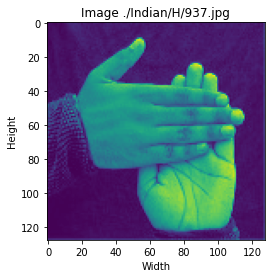

In [ ]:
#check
plot_image(imagepaths[0])

<h1>Acquiring labels from folder names and preprocessing<h1>

In [ ]:
images = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the correct colorspace (GRAY)
  img = cv2.resize(img, (200, 200)) # Reduce image size so training can be faster
  images.append(img)
  
  # Processing label in image path
  category = path.split("/")[2]
  #print(category)
  label = category
  y.append(label)

# Turn images and y into np.array to speed up train_test_split
images = np.array(images, dtype="uint8")
images = images.reshape(len(imagepaths), 200, 200, 1) # reshaping
y = np.array(y)

print("Images loaded: ", len(images))
print("Labels loaded: ", len(y))

print(y[42000], imagepaths[42000]) # Debugging

Images loaded:  42745
Labels loaded:  42745
3 ./Indian/3/197.jpg


P


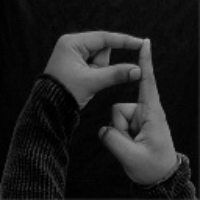

In [ ]:
#Test check
print(y[5500])
cv2_imshow(images[5500])

<h1>Exploratory Data Analysis<h1>

       Sample images       Mean images of each class
H


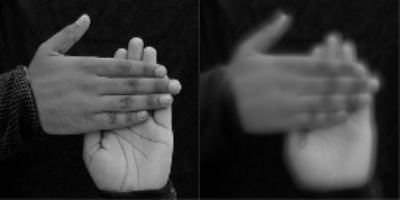

4


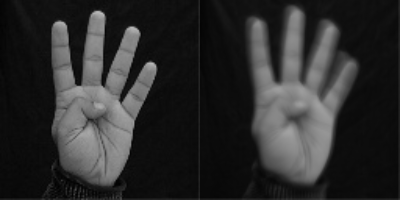

D


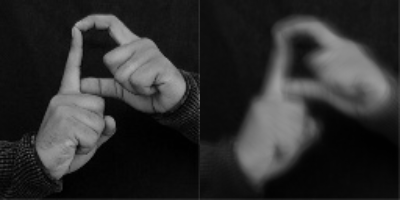

T


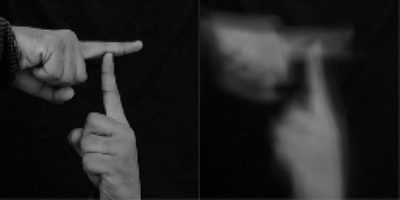

P


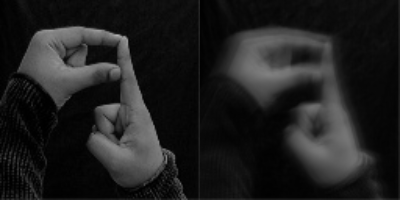

B


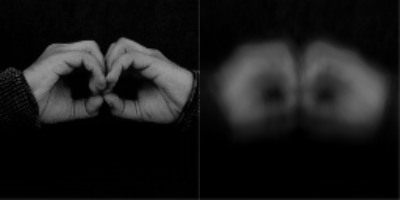

1


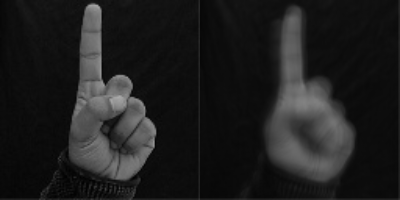

Y


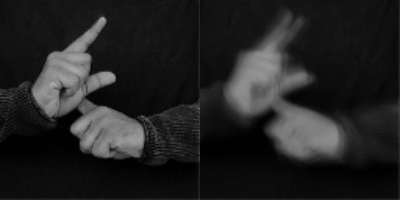

U


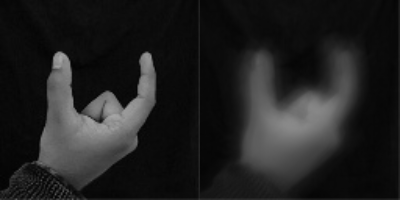

W


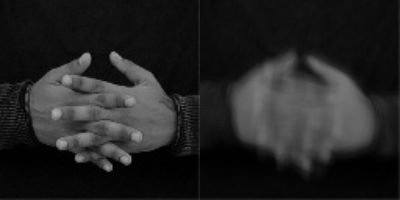

A


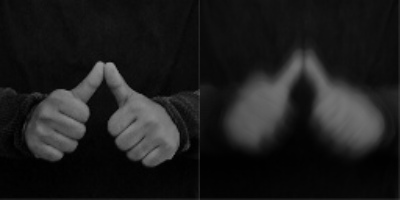

C


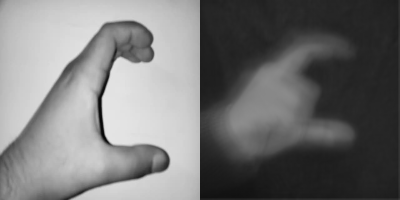

V


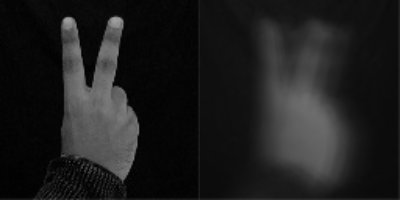

I


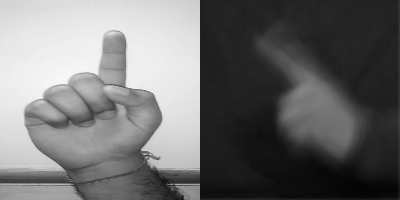

2


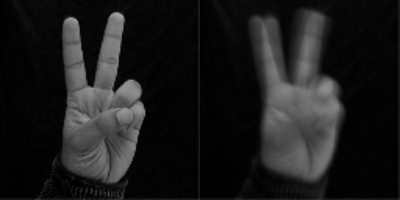

9


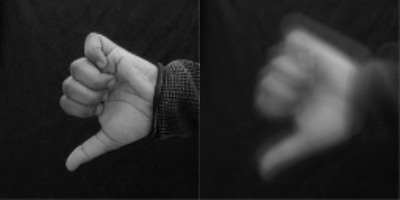

7


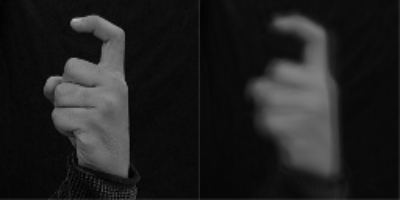

K


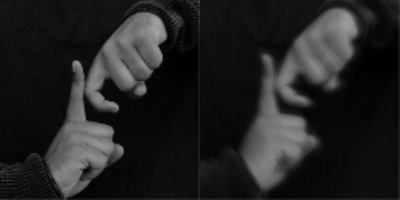

L


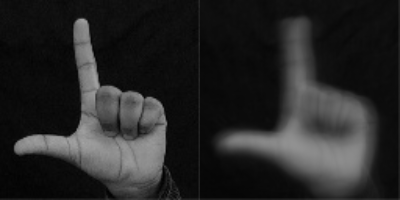

Q


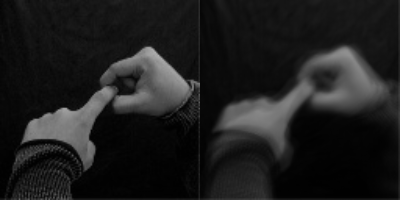

R


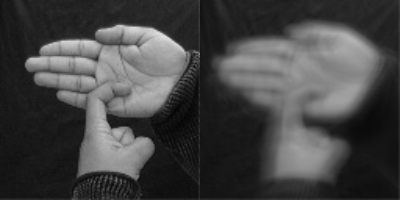

S


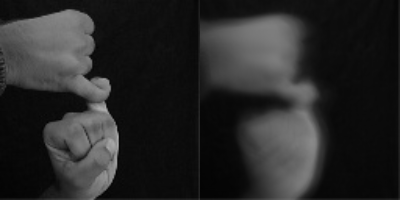

G


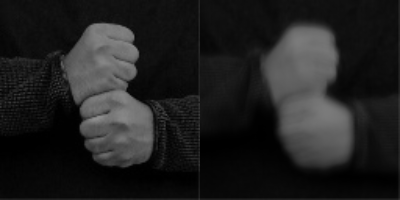

X


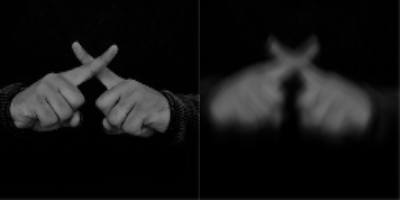

8


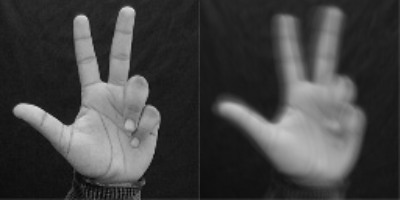

O


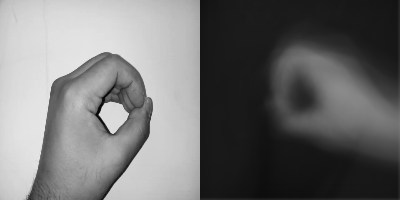

N


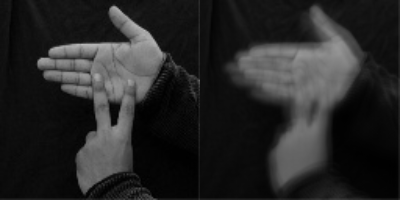

M


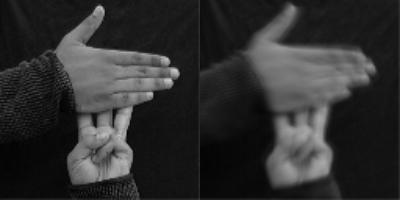

J


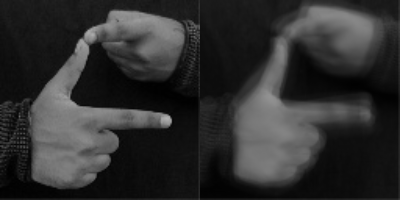

F


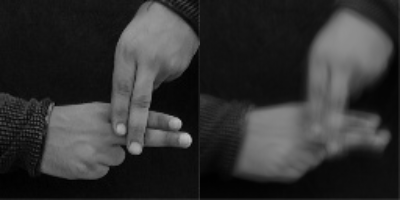

6


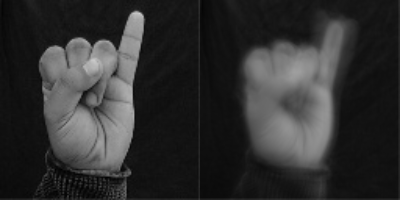

5


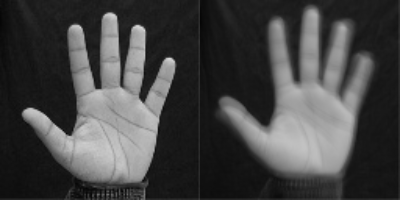

E


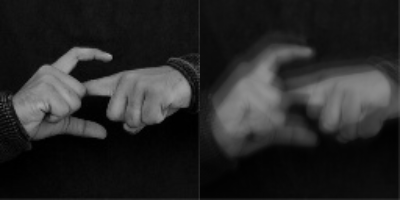

Z


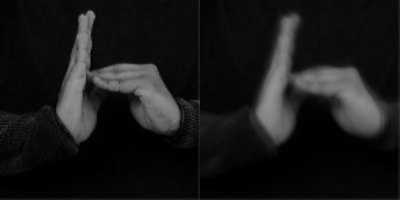

3


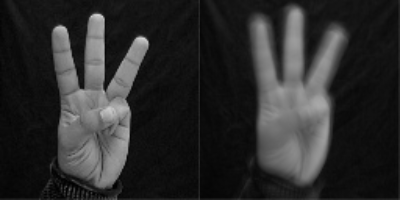

In [ ]:
#Getting mean image of each class
indices=[]
distinct_labels = set()
for i in range(len(y)):
  if y[i] not in distinct_labels:
    distinct_labels.add(y[i])
    indices.append(i)
#print(indices)
print("       Sample images       Mean images of each class")
for i in range(len(indices)-1):
  #cv2_imshow(X[indices[i]])
  print(y[indices[i]])
  mean_img = np.mean(images[indices[i]:indices[i+1]],axis=0)
  mean_img = mean_img.reshape((200,200,1))
  #cv2_imshow(mean_img)
  img_concate_Hori=np.concatenate((images[indices[i]],mean_img),axis=1)
  cv2_imshow(img_concate_Hori)
  


print(y[indices[len(indices)-1]])
mean_img = np.mean(images[indices[len(indices)-1]:len(images)-1],axis=0)
mean_img = mean_img.reshape((200,200,1))
#cv2_imshow(X[indices[len(indices)-1]])
#mean_img = np.mean(X[len(indices)-1:len(X)])
img_concate_Hori=np.concatenate((images[indices[len(indices)-1]],mean_img),axis=1)
cv2_imshow(img_concate_Hori)




       Sample images       Variance images of each class
H


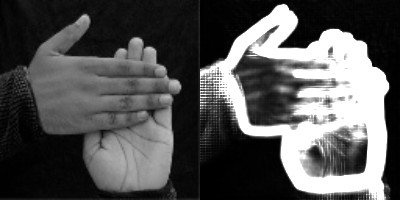

4


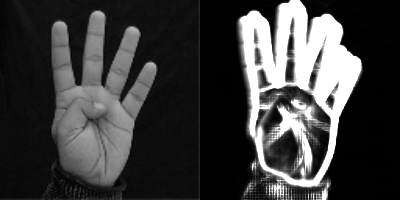

D


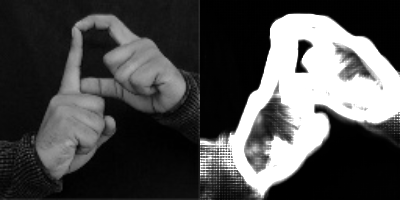

T


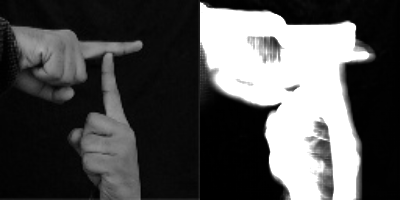

P


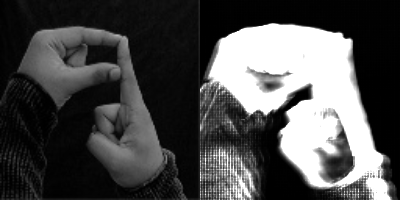

B


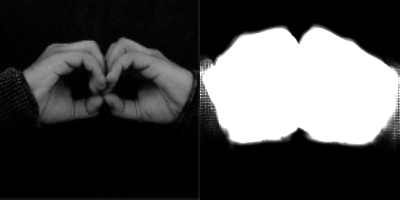

1


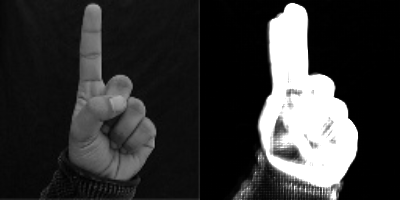

Y


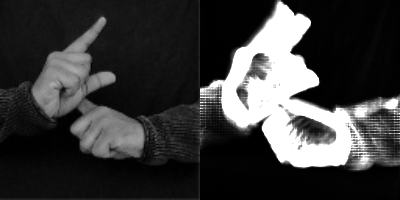

U


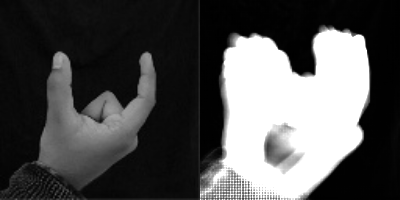

W


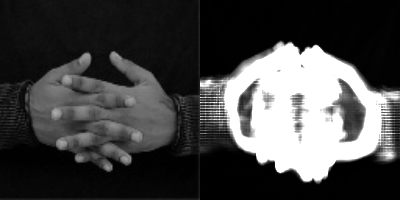

A


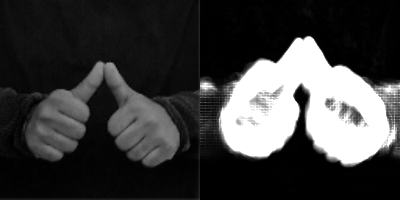

C


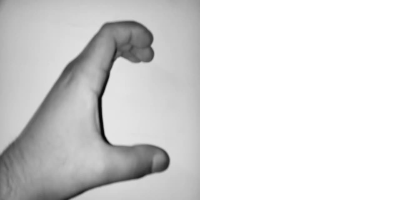

V


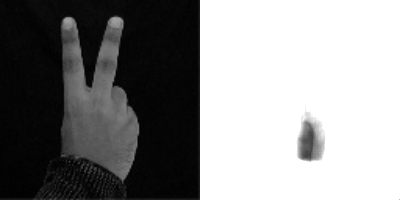

I


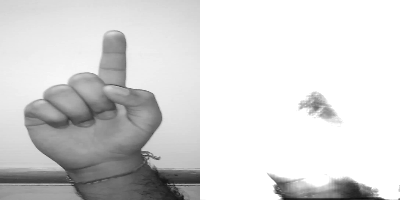

2


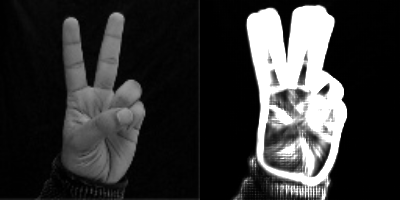

9


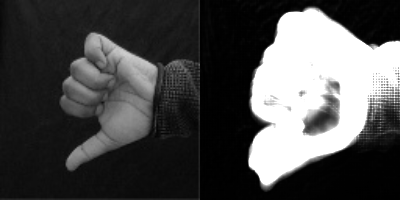

7


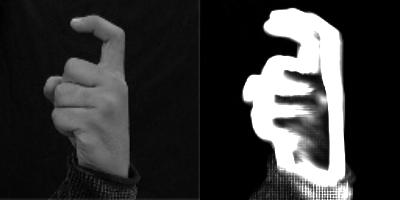

K


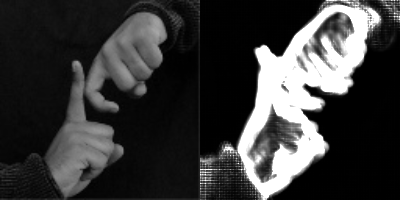

L


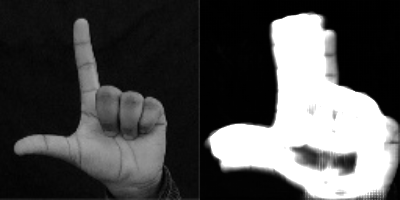

Q


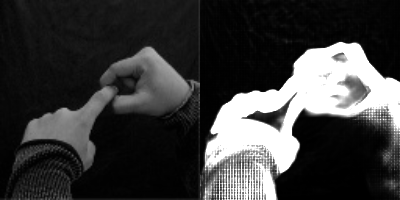

R


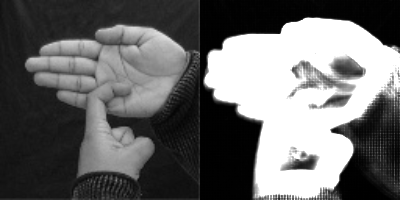

S


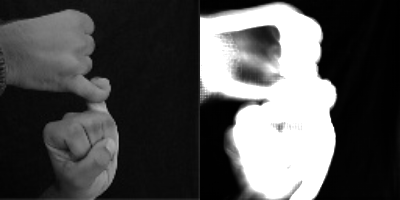

G


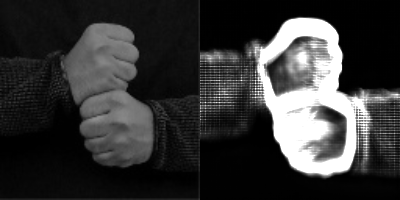

X


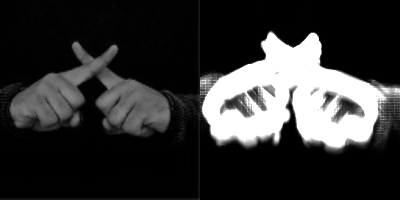

8


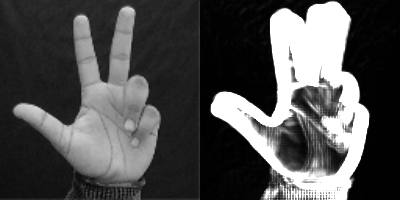

O


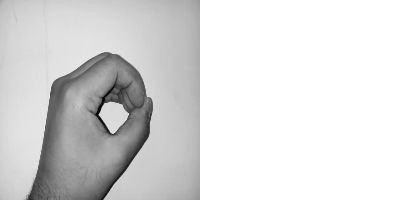

N


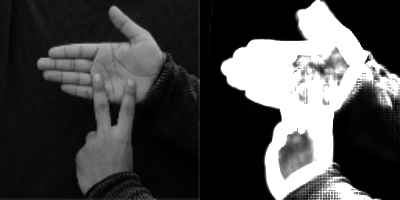

M


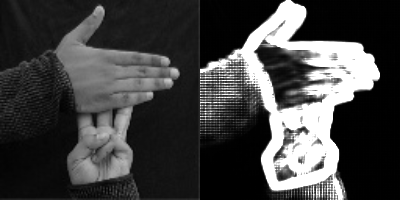

J


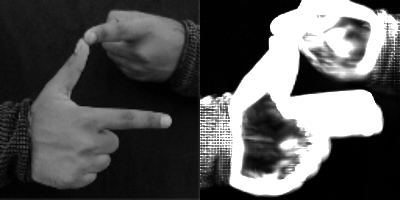

F


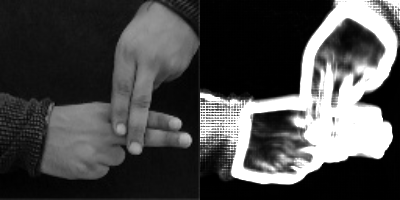

6


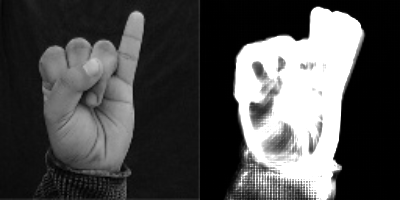

5


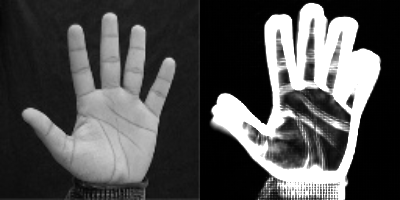

E


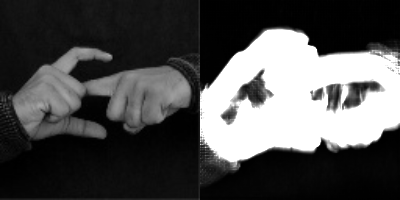

Z


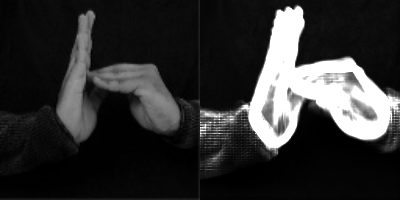

3


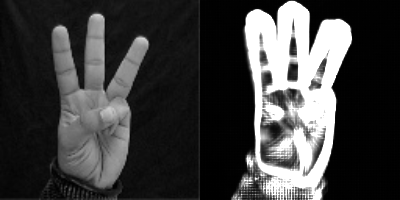

In [ ]:
#Getting variance image of each class
indices=[]
distinct_labels = set()
for i in range(len(y)):
  if y[i] not in distinct_labels:
    distinct_labels.add(y[i])
    indices.append(i)
#print(indices)
print("       Sample images       Variance images of each class")
for i in range(len(indices)-1):
  #cv2_imshow(X[indices[i]])
  print(y[indices[i]])
  var_img = np.var(images[indices[i]:indices[i+1]],axis=0)
  var_img = var_img.reshape((200,200,1))
  #cv2_imshow(mean_img)
  img_concate_Hori=np.concatenate((images[indices[i]],var_img),axis=1)
  cv2_imshow(img_concate_Hori)
  


print(y[indices[len(indices)-1]])
var_img = np.var(images[indices[len(indices)-1]:len(images)-1],axis=0)
var_img = var_img.reshape((200,200,1))
#cv2_imshow(X[indices[len(indices)-1]])
#mean_img = np.mean(X[len(indices)-1:len(X)])
img_concate_Hori=np.concatenate((images[indices[len(indices)-1]],var_img),axis=1)
cv2_imshow(img_concate_Hori)




       Sample images       SD images of each class
H


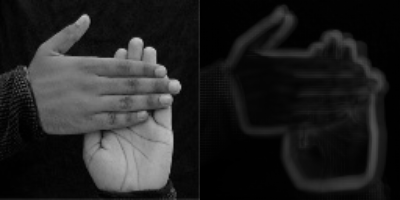

4


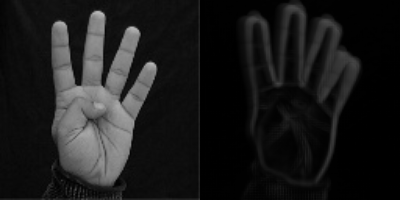

D


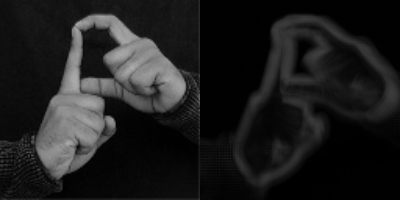

T


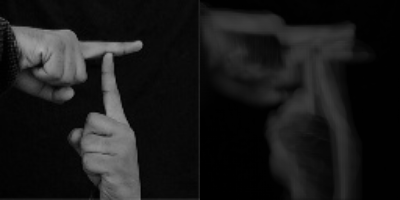

P


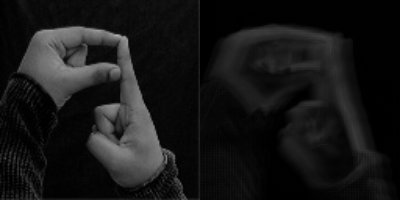

B


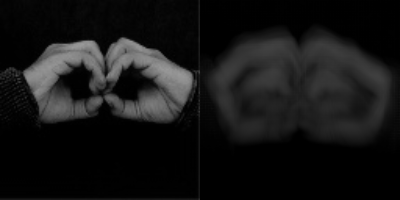

1


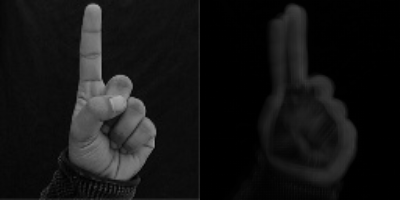

Y


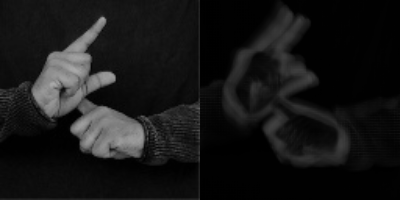

U


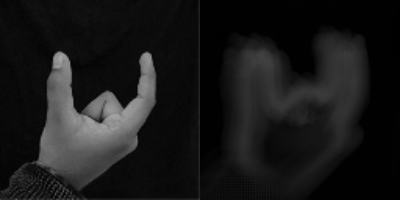

W


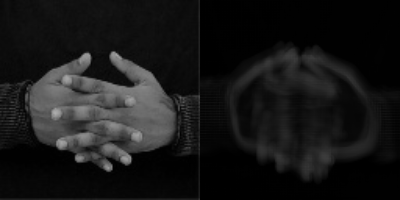

A


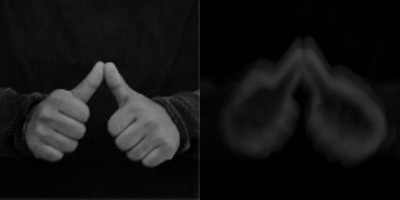

C


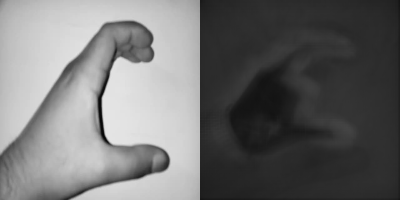

V


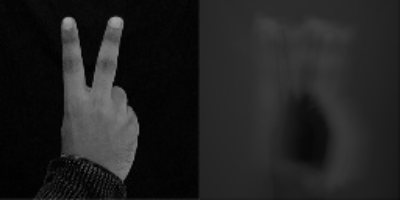

I


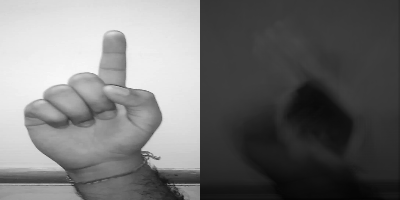

2


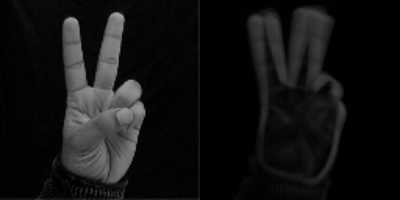

9


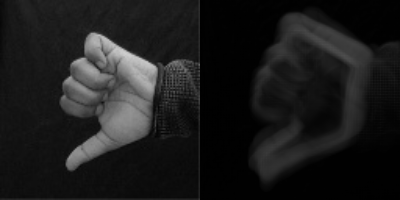

7


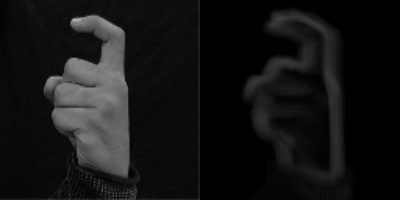

K


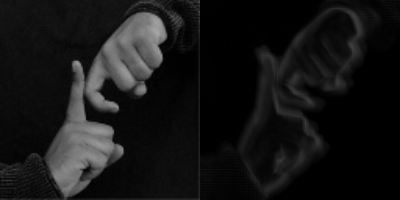

L


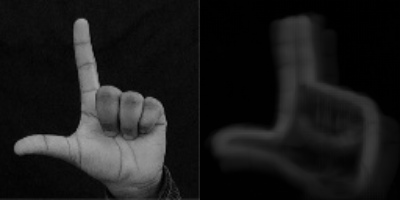

Q


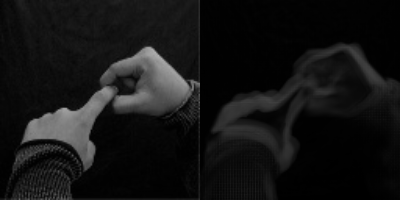

R


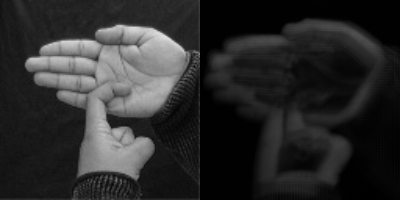

S


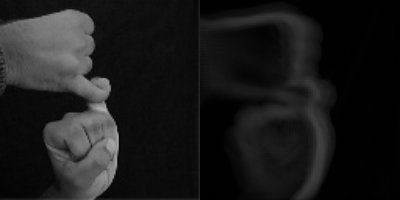

G


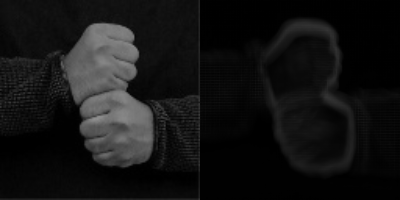

X


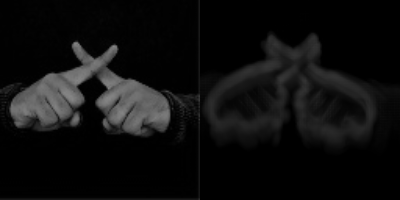

8


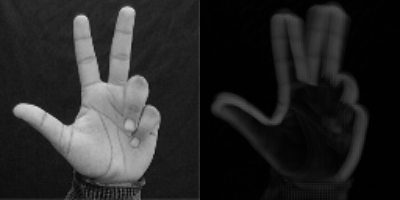

O


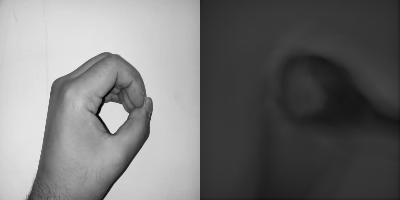

N


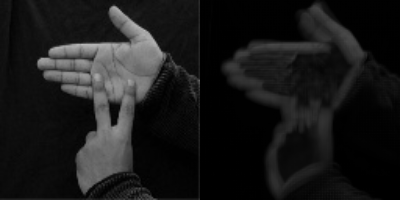

M


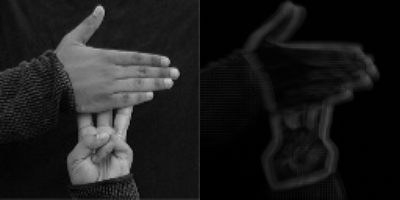

J


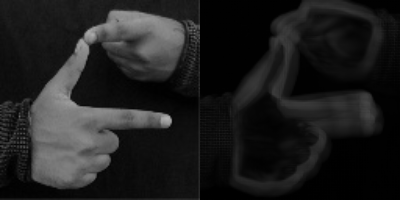

F


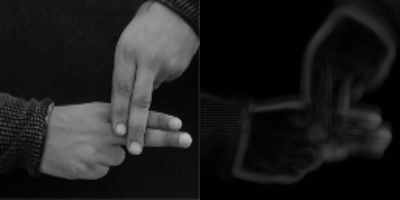

6


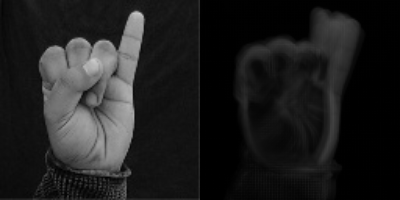

5


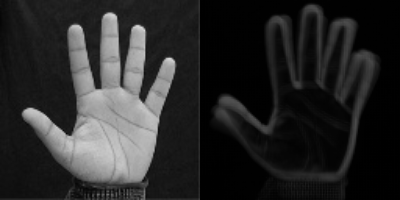

E


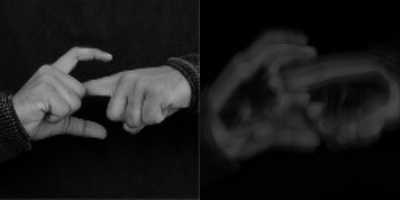

Z


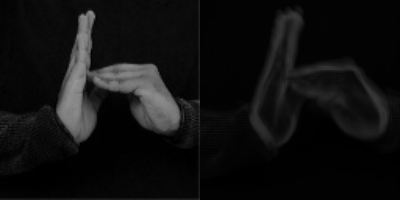

3


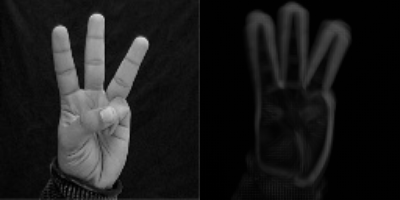

In [ ]:
#Getting standard deviation image of each class
indices=[]
distinct_labels = set()
for i in range(len(y)):
  if y[i] not in distinct_labels:
    distinct_labels.add(y[i])
    indices.append(i)
#print(indices)
print("       Sample images       SD images of each class")
for i in range(len(indices)-1):
  #cv2_imshow(X[indices[i]])
  print(y[indices[i]])
  sd_img = np.std(images[indices[i]:indices[i+1]],axis=0)
  sd_img = sd_img.reshape((200,200,1))
  #cv2_imshow(mean_img)
  img_concate_Hori=np.concatenate((images[indices[i]],sd_img),axis=1)
  cv2_imshow(img_concate_Hori)
  


print(y[indices[len(indices)-1]])
sd_img = np.std(images[indices[len(indices)-1]:len(images)-1],axis=0)
sd_img = sd_img.reshape((200,200,1))
#cv2_imshow(X[indices[len(indices)-1]])
#mean_img = np.mean(X[len(indices)-1:len(X)])
img_concate_Hori=np.concatenate((images[indices[len(indices)-1]],sd_img),axis=1)
cv2_imshow(img_concate_Hori)




<h1>Feature Extraction using ORB<h1>

In [ ]:
#Extracting the keypoints and their descriptors
keypoints=[]
descriptors=[]
for i in range(len(images)):
  img = images[i]
  orb = cv2.ORB_create(nfeatures=2000)
  kp = orb.detect(img,None)
  kp,des = orb.compute(img,kp)
  keypoints.append(kp)
  descriptors.append(des)
print(len(keypoints))
#print(keypoints[0])
print(len(descriptors))
#print(descriptors[0])

42745
42745


9


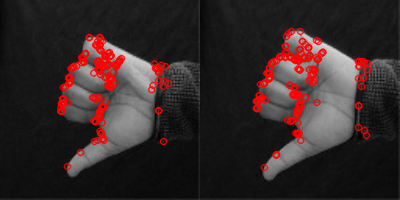

C


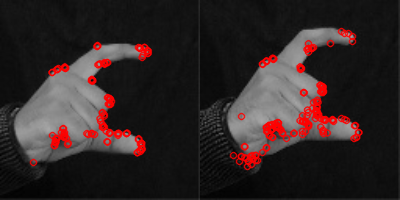

5


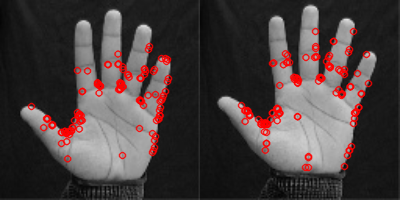

D


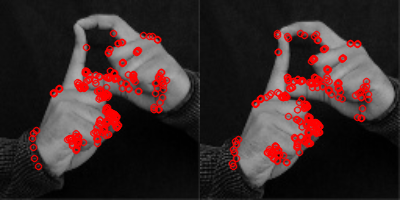

F


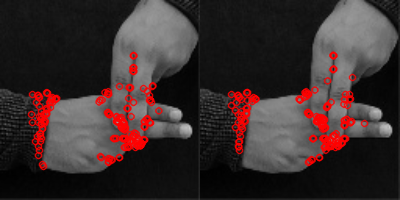

9


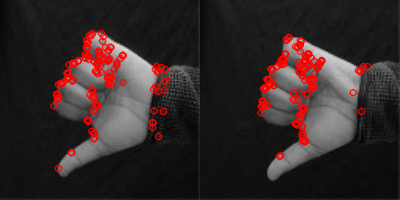

3


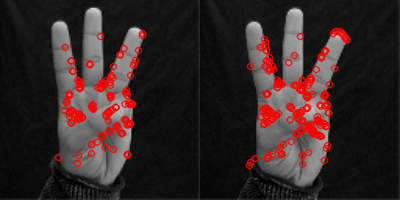

T


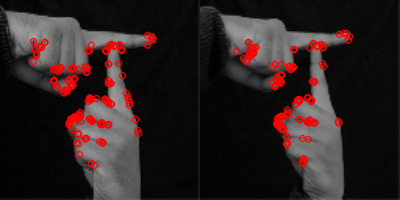

T


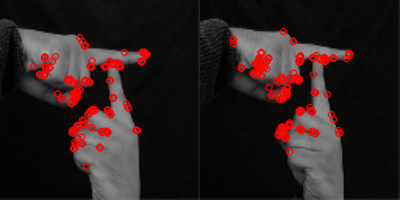

5


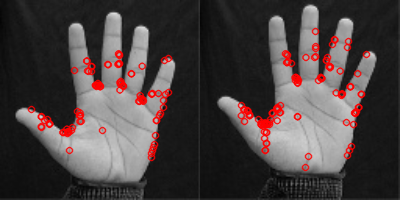

In [ ]:
#displaying the keypoints for a few random images and another sample from the same class
for num in range(10):
  rand = random.randint(0,len(images))
  print(y[rand])
  op_img1 = cv2.drawKeypoints(images[rand],keypoints[rand],None,color=(0,0,255),flags=0)
  op_img2 = cv2.drawKeypoints(images[rand+1],keypoints[rand+1],None,color=(0,0,255),flags=0)
  #cv2_imshow(op_img1)
  #op_img = op_img.reshape((200,200,1))
  img_concat = np.concatenate((op_img1,op_img2),axis=1)
  cv2_imshow(img_concat)


<h1>Train Test Split Indexes<h1>

In [ ]:
def train_test_val_split_idxs(total_rows, percent_test, percent_val):
    if percent_test + percent_val >= 1.0:
        raise ValueError('percent_test and percent_val must sum to less than 1.0')
    row_range = range(total_rows)
    no_test_rows = int(total_rows*(percent_test))
    test_idxs = np.random.choice(row_range, size=no_test_rows, replace=False)
    row_range = [idx for idx in row_range if idx not in test_idxs]
    no_val_rows = int(total_rows*(percent_val))
    val_idxs = np.random.choice(row_range, size=no_val_rows, replace=False)
    training_idxs = [idx for idx in row_range if idx not in val_idxs]

    print('Train-test-val split: %i training rows, %i test rows, %i validation rows' % (len(training_idxs), len(test_idxs), len(val_idxs)))

    return training_idxs, test_idxs, val_idxs

training_idxs, test_idxs, val_idxs = train_test_val_split_idxs(len(descriptors), 0.4, 0.0)

Train-test-val split: 25647 training rows, 17098 test rows, 0 validation rows


<h1>Bag of Visual Words<h1>

In [ ]:
def cluster_features(img_descs, training_idxs, cluster_model):
  
    n_clusters = cluster_model.n_clusters
    training_descs = [img_descs[i] for i in training_idxs]
    all_train_descriptors=[]
    for desc_list in training_descs:
      if desc_list is not None:
        for desc in desc_list:
          all_train_descriptors.append(desc)
    #all_train_descriptors = [desc for desc_list in training_descs for desc in desc_list]
    all_train_descriptors = np.array(all_train_descriptors)

    print ('%i descriptors before clustering' % all_train_descriptors.shape[0])
    

    print ('Using clustering model %s...' % repr(cluster_model))
    print ('Clustering on training set to get codebook of %i words' % n_clusters)
    cluster_model.fit(all_train_descriptors)
    print ('done clustering. Using clustering model to generate BoW histograms for each image.')
    new = []
    for i in img_descs:
      if i is not None:
        new.append(i)
    
    img_clustered_words = [cluster_model.predict(raw_words) for raw_words in new]

    img_bow_hist = np.array(
        [np.bincount(clustered_words, minlength=n_clusters) for clustered_words in img_clustered_words])

    X = img_bow_hist
    print ('done generating BoW histograms.')

    return X, cluster_model
X, cluster_model = cluster_features(descriptors, training_idxs, MiniBatchKMeans(n_clusters=150))

4399616 descriptors before clustering
Using clustering model MiniBatchKMeans(n_clusters=150)...
Clustering on training set to get codebook of 150 words
done clustering. Using clustering model to generate BoW histograms for each image.
done generating BoW histograms.


<h1>Train Test Split<h1>

In [ ]:
def perform_data_split(X, y, training_idxs, test_idxs):
    temp1=[]
    temp2 =[]
    for i in training_idxs:
      if(i<len(X)):
        temp1.append(i)
    for i in test_idxs:
      if(i<len(X)):
        temp2.append(i)
    
    X_train = X[temp1]
    y_train = y[temp1]

    X_test = X[temp2]
    y_test = y[temp2]


    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = perform_data_split(X, y, training_idxs, test_idxs)

In [ ]:
#shuffling the data to ensure better training
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)

<h1>Evaluation Metrics<h1>

In [ ]:
beforepca_accuracy = []
beforepca_precision = []
beforepca_f1 = []
beforepca_recall = []

In [ ]:
afterpca_accuracy = []
afterpca_precision = []
afterpca_f1 = []
afterpca_recall = []

In [ ]:
def calc_accuracy(method,label_test,pred):

    acc = sm.accuracy_score(label_test,pred)
    print("accuracy score for ",method,acc)
    beforepca_accuracy.append(acc)

    pre = sm.precision_score(label_test,pred,average='macro')
    print("precision_score for ",method,pre)
    beforepca_precision.append(pre)

    fone = sm.f1_score(label_test,pred,average='macro')
    print("f1 score for ",method,fone)
    beforepca_f1.append(fone)

    rec = sm.recall_score(label_test,pred,average='macro')
    print("recall score for ",method,rec)
    beforepca_recall.append(rec)
    

In [ ]:
def calc_accuracy_pca(method,label_test,pred):

    acc = sm.accuracy_score(label_test,pred)
    print("accuracy score for ",method,acc)
    afterpca_accuracy.append(acc)

    pre = sm.precision_score(label_test,pred,average='macro')
    print("precision_score for ",method,pre)
    afterpca_precision.append(pre)

    fone = sm.f1_score(label_test,pred,average='macro')
    print("f1 score for ",method,fone)
    afterpca_f1.append(fone)

    rec = sm.recall_score(label_test,pred,average='macro')
    print("recall score for ",method,rec)
    afterpca_recall.append(rec)

<h1>Models before PCA<h1>

In [ ]:
def predict_svm(X_train, X_test, y_train, y_test):
    svc=SVC(kernel='linear') 
    print("svm started")
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    calc_accuracy("SVM",y_test,y_pred)
predict_svm(X_train, X_test,y_train, y_test)

svm started
accuracy score for  SVM 0.9989471837164415
precision_score for  SVM 0.9989730849493961
f1 score for  SVM 0.9989719815393505
recall score for  SVM 0.9989725108346736


In [ ]:
def predict_lr(X_train, X_test, y_train, y_test):
    clf = lr()
    print("lr started")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    calc_accuracy("Logistic regression",y_test,y_pred)
predict_lr(X_train, X_test,y_train, y_test)

lr started
accuracy score for  Logistic regression 0.9988886939229105
precision_score for  Logistic regression 0.998920243912007
f1 score for  Logistic regression 0.9989216491596813
recall score for  Logistic regression 0.9989252652609963


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def predict_nb(X_train, X_test, y_train, y_test):
    clf = nb()
    print("nb started")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    calc_accuracy("Naive Bayes",y_test,y_pred)
predict_nb(X_train, X_test,y_train, y_test)

nb started
accuracy score for  Naive Bayes 0.9916359595250629
precision_score for  Naive Bayes 0.9922005444950185
f1 score for  Naive Bayes 0.9921034124468571
recall score for  Naive Bayes 0.9922439188894564


In [ ]:
def predict_knn(X_train, X_test, y_train, y_test):
    clf=knn(n_neighbors=8)
    print("knn started")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    calc_accuracy("K nearest neighbours",y_test,y_pred)
predict_knn(X_train, X_test,y_train, y_test)

knn started
accuracy score for  K nearest neighbours 0.9989471837164415
precision_score for  K nearest neighbours 0.9989603780712668
f1 score for  K nearest neighbours 0.9989671554355628
recall score for  K nearest neighbours 0.9989763643927331


In [ ]:
def predict_mlp(X_train, X_test, y_train, y_test):
    clf=mlp(random_state=0)
    print("mlp started")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    calc_accuracy("MLP classifier",y_test,y_pred)
predict_mlp(X_train, X_test,y_train, y_test)

mlp started
accuracy score for  MLP classifier 0.9989471837164415
precision_score for  MLP classifier 0.9989603742903763
f1 score for  MLP classifier 0.9989616189942739
recall score for  MLP classifier 0.9989644531108172


In [ ]:
for i in range(5):
    beforepca_accuracy[i]*=10000
    beforepca_precision[i]*=10000
    beforepca_f1[i]*=10000
    beforepca_recall[i]*=10000

<h1>PCA<h1>

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 25)
X_train_pca = pca.fit_transform(X_train)

<h1>Models after PCA<h1>

In [ ]:
def predict_svm(X_train_pca, X_test, y_train, y_test):
    svc=SVC(kernel='linear') 
    print("svm started")
    X_test_pca = pca.transform(X_test)
    svc.fit(X_train_pca,y_train)
    y_pred=svc.predict(X_test_pca)
    calc_accuracy_pca("SVM",y_test,y_pred)
predict_svm(X_train_pca, X_test,y_train, y_test)

svm started
accuracy score for  SVM 0.995964204246359
precision_score for  SVM 0.9960886410377979
f1 score for  SVM 0.9960959556484338
recall score for  SVM 0.9961145972035224


In [ ]:
def predict_lr(X_train, X_test, y_train, y_test):
    clf_pca = lr()
    print("lr started")
    X_test_pca = pca.transform(X_test)
    clf_pca.fit(X_train_pca,y_train)
    y_pred_pca=clf_pca.predict(X_test_pca)
    calc_accuracy_pca("Logistic regression",y_test,y_pred_pca)
predict_lr(X_train_pca, X_test,y_train, y_test)

lr started
accuracy score for  Logistic regression 0.9953793063110488
precision_score for  Logistic regression 0.9955200711205675
f1 score for  Logistic regression 0.9955134454976512
recall score for  Logistic regression 0.9955150238138464


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def predict_nb(X_train, X_test, y_train, y_test):
    clf_pca = nb()
    print("nb started")
    X_test_pca = pca.transform(X_test)
    clf_pca.fit(X_train_pca,y_train)
    y_pred_pca=clf_pca.predict(X_test_pca)
    calc_accuracy_pca("Naive Bayes",y_test,y_pred_pca)
predict_nb(X_train_pca, X_test,y_train, y_test)

nb started
accuracy score for  Naive Bayes 0.9832719190501258
precision_score for  Naive Bayes 0.9848901501897884
f1 score for  Naive Bayes 0.9843945340935885
recall score for  Naive Bayes 0.9841127561810826


In [ ]:
def predict_knn(X_train, X_test, y_train, y_test):
    clf_pca=knn(n_neighbors=8)
    print("knn started")
    X_test_pca = pca.transform(X_test)
    clf_pca.fit(X_train_pca,y_train)
    y_pred_pca=clf_pca.predict(X_test_pca)
    calc_accuracy_pca("K nearest neighbours",y_test,y_pred_pca)
predict_knn(X_train_pca, X_test,y_train, y_test)

knn started
accuracy score for  K nearest neighbours 0.9987717143358484
precision_score for  K nearest neighbours 0.9987868400669715
f1 score for  K nearest neighbours 0.9987888147576622
recall score for  K nearest neighbours 0.9987936237521077


In [ ]:
def predict_mlp(X_train, X_test, y_train, y_test):
    clf_pca=mlp(random_state=0)
    print("mlp started")
    X_test_pca = pca.transform(X_test)
    clf_pca.fit(X_train_pca,y_train)
    y_pred_pca=clf_pca.predict(X_test_pca)
    calc_accuracy_pca("MLP classifier",y_test,y_pred_pca)
predict_mlp(X_train_pca, X_test,y_train, y_test)

mlp started
accuracy score for  MLP classifier 0.9977773878458209
precision_score for  MLP classifier 0.9978160503621177
f1 score for  MLP classifier 0.9978157801995978
recall score for  MLP classifier 0.9978209727848361


In [ ]:
for i in range(5):
    afterpca_accuracy[i]*=10000
    afterpca_precision[i]*=10000
    afterpca_f1[i]*=10000
    afterpca_recall[i]*=10000

#Visualization

##Before PCA

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

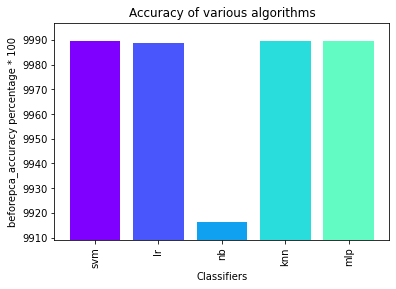

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
labels = ['svm','lr','nb', 'knn', 'mlp']
low = min(beforepca_accuracy)
high = max(beforepca_accuracy)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])
plt.bar(labels,
        beforepca_accuracy,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('beforepca_accuracy percentage * 100')
plt.title('Accuracy of various algorithms')
plt.xticks(rotation=90)

In [ ]:
svm_plot = []
lr_plot = []
nb_plot = []
knn_plot = []
mlp_plot = []

In [ ]:
svm_plot.append(beforepca_accuracy[0])
svm_plot.append(beforepca_precision[0])
svm_plot.append(beforepca_f1[0])
svm_plot.append(beforepca_recall[0])

lr_plot.append(beforepca_accuracy[1])
lr_plot.append(beforepca_precision[1])
lr_plot.append(beforepca_f1[1])
lr_plot.append(beforepca_recall[1])

nb_plot.append(beforepca_accuracy[2])
nb_plot.append(beforepca_precision[2])
nb_plot.append(beforepca_f1[2])
nb_plot.append(beforepca_recall[2])

knn_plot.append(beforepca_accuracy[3])
knn_plot.append(beforepca_precision[3])
knn_plot.append(beforepca_f1[3])
knn_plot.append(beforepca_recall[3])

mlp_plot.append(beforepca_accuracy[4])
mlp_plot.append(beforepca_precision[4])
mlp_plot.append(beforepca_f1[4])
mlp_plot.append(beforepca_recall[4])

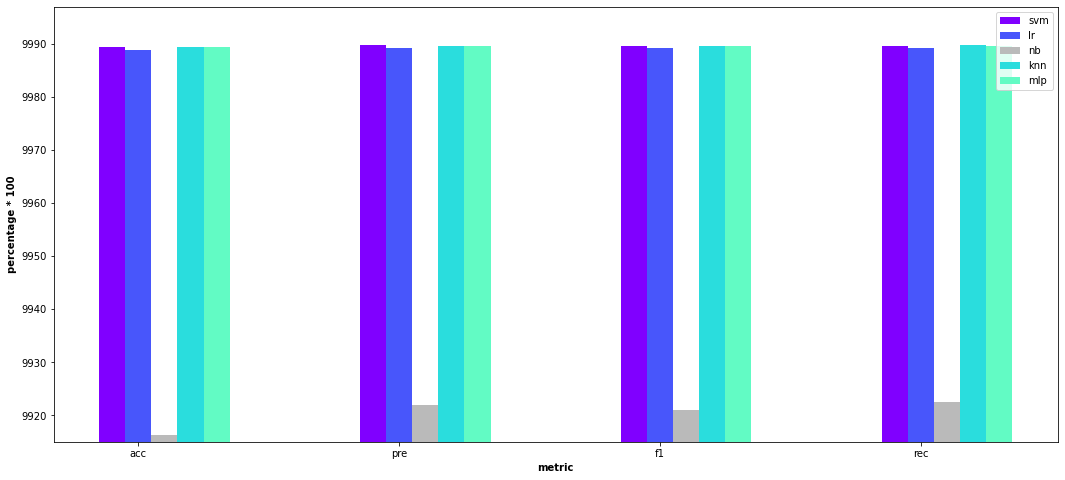

In [ ]:
barWidth = 0.1
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(4)
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]

low = min(beforepca_recall)
high = max(beforepca_recall)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, svm_plot, color='#8000FF', width=barWidth, label='svm')
plt.bar(pos2, lr_plot, color='#4856FB', width=barWidth, label='lr')
plt.bar(pos3, nb_plot, color='#BABABA', width=barWidth, label='nb')
plt.bar(pos4, knn_plot, color='#2ADDDD', width=barWidth, label='knn')
plt.bar(pos5, mlp_plot, color='#62FBC4', width=barWidth, label='mlp')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(4)], ['acc', 'pre', 'f1', 'rec'])

ax.legend(fontsize = 14)
plt.legend(loc=1)

##After PCA

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

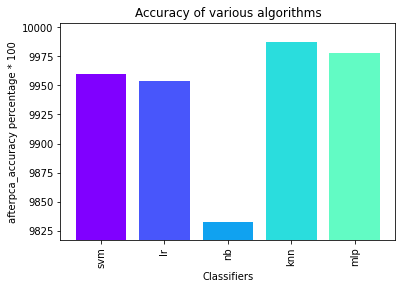

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
labels = ['svm','lr','nb', 'knn', 'mlp']
low = min(afterpca_accuracy)
high = max(afterpca_accuracy)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])
plt.bar(labels,
        afterpca_accuracy,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('afterpca_accuracy percentage * 100')
plt.title('Accuracy of various algorithms')
plt.xticks(rotation=90)

In [ ]:
svm_plot_after = []
lr_plot_after = []
nb_plot_after = []
knn_plot_after = []
mlp_plot_after = []

In [ ]:
svm_plot_after.append(afterpca_accuracy[0])
svm_plot_after.append(afterpca_precision[0])
svm_plot_after.append(afterpca_f1[0])
svm_plot_after.append(afterpca_recall[0])

lr_plot_after.append(afterpca_accuracy[1])
lr_plot_after.append(afterpca_precision[1])
lr_plot_after.append(afterpca_f1[1])
lr_plot_after.append(afterpca_recall[1])

nb_plot_after.append(afterpca_accuracy[2])
nb_plot_after.append(afterpca_precision[2])
nb_plot_after.append(afterpca_f1[2])
nb_plot_after.append(afterpca_recall[2])

knn_plot_after.append(afterpca_accuracy[3])
knn_plot_after.append(afterpca_precision[3])
knn_plot_after.append(afterpca_f1[3])
knn_plot_after.append(afterpca_recall[3])

mlp_plot_after.append(afterpca_accuracy[4])
mlp_plot_after.append(afterpca_precision[4])
mlp_plot_after.append(afterpca_f1[4])
mlp_plot_after.append(afterpca_recall[4])

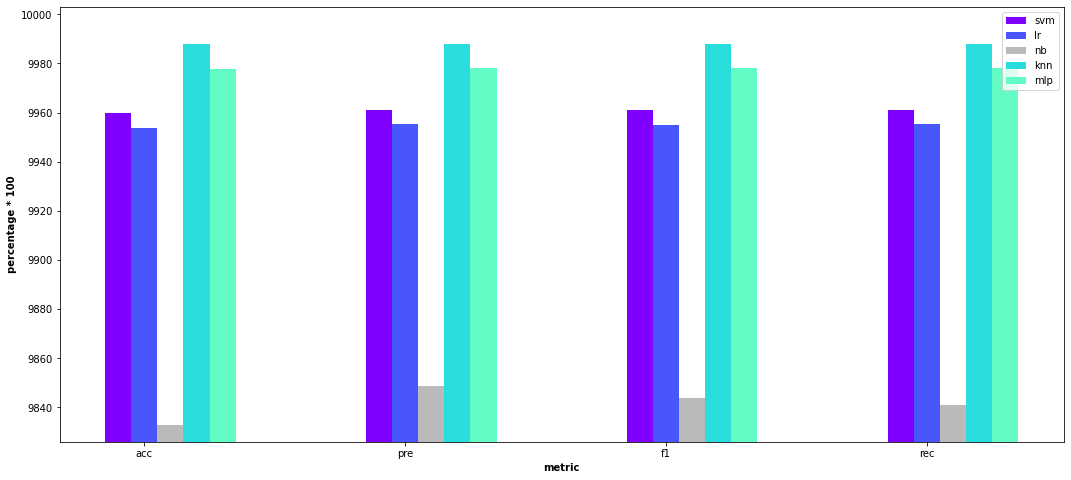

In [ ]:
barWidth = 0.1
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(4)
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]

low = min(afterpca_recall)
high = max(afterpca_recall)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, svm_plot_after, color='#8000FF', width=barWidth, label='svm')
plt.bar(pos2, lr_plot_after, color='#4856FB', width=barWidth, label='lr')
plt.bar(pos3, nb_plot_after, color='#BABABA', width=barWidth, label='nb')
plt.bar(pos4, knn_plot_after, color='#2ADDDD', width=barWidth, label='knn')
plt.bar(pos5, mlp_plot_after, color='#62FBC4', width=barWidth, label='mlp')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(4)], ['acc', 'pre', 'f1', 'rec'])

ax.legend(fontsize = 14)
plt.legend(loc=1)

#comparison

## Accuracy

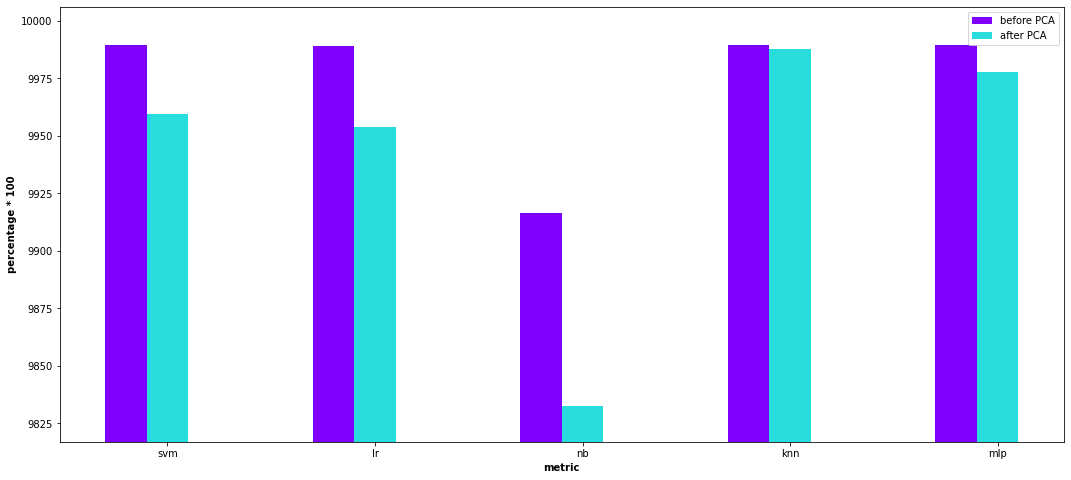

In [ ]:
## Accuracy comparison

barWidth = 0.2
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(5)
pos2 = [x + barWidth for x in pos1]

low = min(afterpca_accuracy)
high = max(beforepca_accuracy)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, beforepca_accuracy, color='#8000FF', width=barWidth, label='before PCA')
plt.bar(pos2, afterpca_accuracy, color='#2ADDDD', width=barWidth, label='after PCA')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(5)], ['svm', 'lr', 'nb', 'knn','mlp'])

ax.legend(fontsize = 14)
plt.legend(loc=1)

## Precision

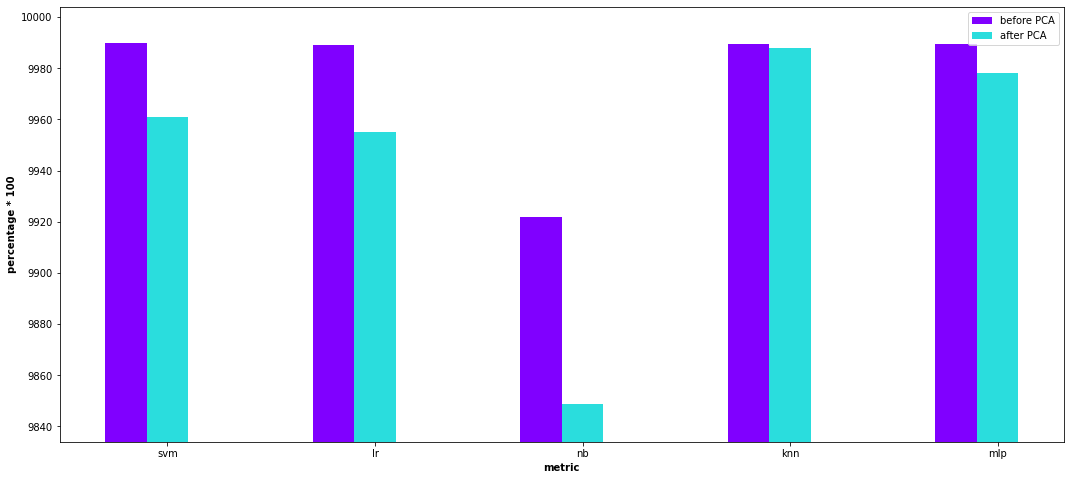

In [ ]:
## precisiom comparison

barWidth = 0.2
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(5)
pos2 = [x + barWidth for x in pos1]

low = min(afterpca_precision)
high = max(beforepca_precision)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, beforepca_precision, color='#8000FF', width=barWidth, label='before PCA')
plt.bar(pos2, afterpca_precision, color='#2ADDDD', width=barWidth, label='after PCA')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(5)], ['svm', 'lr', 'nb', 'knn','mlp'])

ax.legend(fontsize = 14)
plt.legend(loc=1)

#F1 score

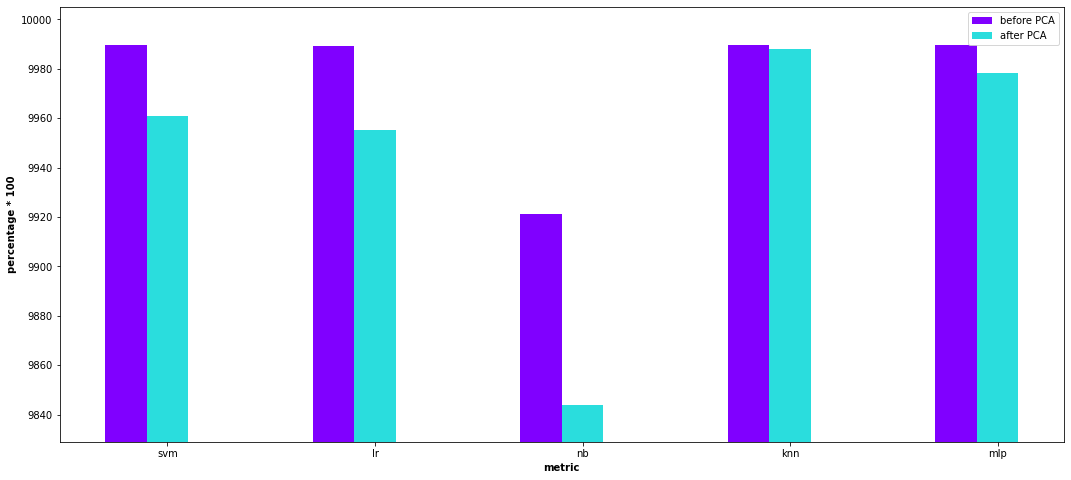

In [ ]:
## f1 comparison

barWidth = 0.2
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(5)
pos2 = [x + barWidth for x in pos1]

low = min(afterpca_f1)
high = max(beforepca_f1)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, beforepca_f1, color='#8000FF', width=barWidth, label='before PCA')
plt.bar(pos2, afterpca_f1, color='#2ADDDD', width=barWidth, label='after PCA')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(5)], ['svm', 'lr', 'nb', 'knn','mlp'])

ax.legend(fontsize = 14)
plt.legend(loc=1)

## Recall

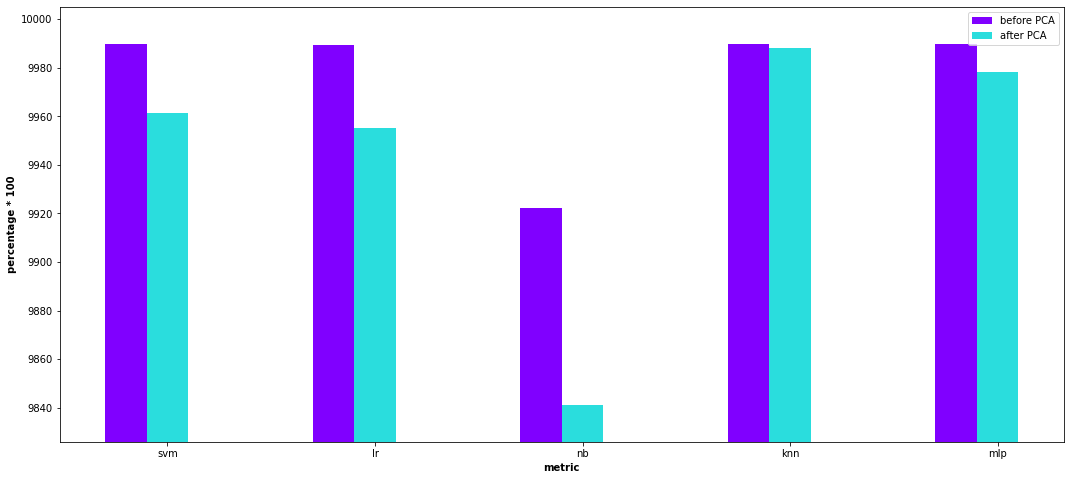

In [ ]:
## recall comparison

barWidth = 0.2
f, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
# Set position of bar on X axis
pos1 = np.arange(5)
pos2 = [x + barWidth for x in pos1]

low = min(afterpca_recall)
high = max(beforepca_recall)
plt.ylim([math.floor(low-0.1*(high-low)), math.ceil(high+0.1*(high-low))])

# Make the plot
plt.bar(pos1, beforepca_recall, color='#8000FF', width=barWidth, label='before PCA')
plt.bar(pos2, afterpca_recall, color='#2ADDDD', width=barWidth, label='after PCA')

# Add xticks on the middle of the group bars
plt.xlabel('metric', fontweight='bold')
plt.ylabel('percentage * 100', fontweight='bold')
plt.xticks([i + barWidth for i in range(5)], ['svm', 'lr', 'nb', 'knn','mlp'])

ax.legend(fontsize = 14)
plt.legend(loc=1)